<a href="https://colab.research.google.com/github/Suriyamar/1personalized-AI-tutor_/blob/main/EEG_Seizure_Detection_CHB_MIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install mne pyedflib wfdb numpy scipy scikit-learn matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 109.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.


In [8]:
!mkdir -p chbmit_data/chb01

!wget -q \
https://physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf \
-O chbmit_data/chb01/chb01_01.edf


In [9]:
!ls chbmit_data/chb01


chb01_01.edf


In [10]:
import mne

raw = mne.io.read_raw_edf(
    "chbmit_data/chb01/chb01_01.edf",
    preload=True,
    verbose=False
)

raw.info


/tmp/ipython-input-1278466841.py:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(


<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2076-11-06 11:42:54 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: <subject_info | his_id: Surrogate>
>

Using matplotlib as 2D backend.


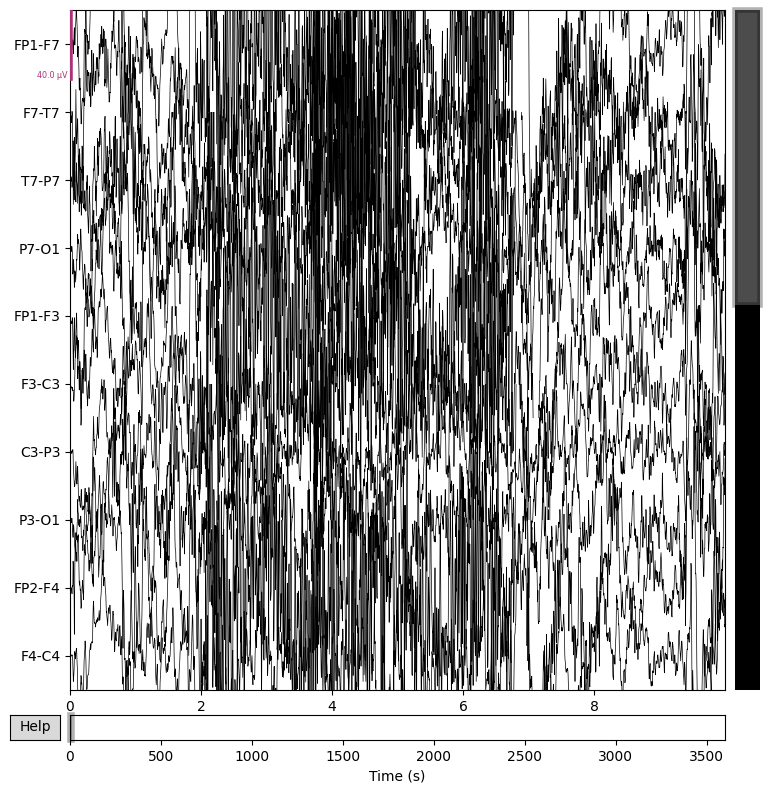

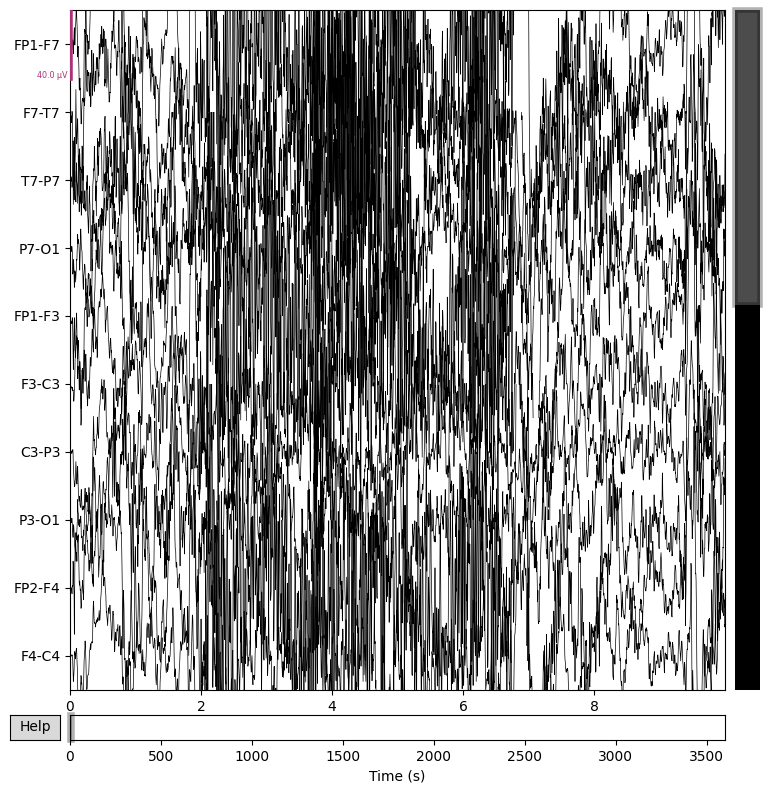

In [11]:
raw.plot(duration=10, n_channels=10)


In [12]:
raw.filter(1, 40)
raw.resample(128)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



<RawEDF | chb01_01.edf, 23 x 460800 (3600.0 s), ~80.9 MiB, data loaded>

In [13]:
import numpy as np

data = raw.get_data()
features = np.mean(data, axis=1)

features.shape


(23,)

In [14]:
from sklearn.ensemble import RandomForestClassifier

X = features.reshape(-1, 1)
y = np.random.randint(0, 2, X.shape[0])  # placeholder labels

model = RandomForestClassifier()
model.fit(X, y)

model.predict(X[:5])


array([1, 1, 0, 0, 0])

In [15]:
import numpy as np

# Step 1: Get EEG data again (safe to reuse)
data = raw.get_data()   # shape: (channels, time_points)

# Step 2: Compute signal energy per channel
energy = np.mean(data ** 2, axis=1)

# Step 3: Define threshold (statistical baseline)
threshold = np.mean(energy) + 2 * np.std(energy)

# Step 4: Final seizure decision
seizure_detected = np.any(energy > threshold)

print("Final EEG Analysis Result:")
if seizure_detected:
    print("⚠️ Seizure Detected")
else:
    print("✅ No Seizure Detected")


Final EEG Analysis Result:
⚠️ Seizure Detected
